In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten , Dense 

In [5]:
tf.__version__

'2.6.2'

In [7]:
# Making the Paths 
train_data_dir=r"C:\Users\ASUS\Downloads\cat-dog-data\train"
test_data_dir=r"C:\Users\ASUS\Downloads\cat-dog-data\validation"

In [9]:
# Making generators
train_data_generator=keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=(224,224),
    batch_size=32,
    labels='inferred',
    label_mode='int')

test_data_generator=keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=(224,224),
    batch_size=32,
    labels='inferred',
    label_mode='int'
)

Found 337 files belonging to 2 classes.
Found 59 files belonging to 2 classes.


In [10]:
#This is a function to standardizing and normalization
#def process(image,label):
#    image=tf.cast(image/255.,tf.float32)
#    return image,label

#train_data_generator=train_data_generator.map(process)
#test_data_generator=test_data_generator.map(process)

In [14]:
#Start Making The model
base_model=VGG16(
    include_top=False,
    input_shape=(224,224,3),
    weights='imagenet',
)

In [11]:
3*3*64*3


1728

In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
for layer in base_model.layers:
    layer.trainable=False

In [20]:
for layer in base_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001ECD2AAA5C0> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2AC9E80> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B06400> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ECD2B388D0> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B43A20> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B43908> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ECD2B4E080> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B561D0> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B56EB8> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B49828> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ECD2B5EC50> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B64DA0> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B437F0> False
<keras.layers.convolutional.Conv2D object at 0x000001ECD2B6C828> False
<ker

In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
model=keras.models.Sequential()

#adding base model 
model.add(base_model)

#Flatten
model.add(Flatten())
#Dense1
model.add(Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
history=model.fit(
    train_data_generator,
    epochs=2,
    validation_data=test_data_generator)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - ETA: 0s - loss: 12.0812 - accuracy: 0.7893WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001ECD2D76B70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [32]:
model.save('cat_dog_classifier_try_new.keras')

In [34]:
model1=tf.keras.models.load_model('cat_dog_classifier_try_new.keras')

In [3]:
import sys

In [7]:

sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

<AxesSubplot:>

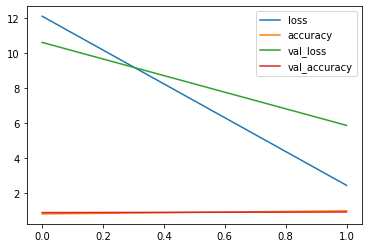

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [42]:
import cv2
img=cv2.imread('cat.2427.jpg')



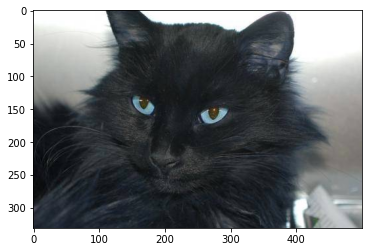

In [44]:
import matplotlib.pyplot as plt 
plt.imshow(img)

In [46]:
img.shape

(331, 500, 3)

In [48]:
import numpy as np 
img=cv2.resize(img,(224,224))
img.shape

(224, 224, 3)

In [50]:
img=np.resize(img,(1,224,224,3))

In [52]:
img.shape

(1, 224, 224, 3)

In [54]:
ans=model1.predict(img)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [56]:
if ans==0:
    print('Cat')
else:
    print('Dog')

Cat
